<a href="https://colab.research.google.com/github/qedir051/ML-Projects/blob/main/Training_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.dropna(inplace=True)
train.isna().sum()

x    0
y    0
dtype: int64

# Method 1

In [ ]:
X = train.drop("y", axis=1)
y = train["y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 1), (140, 1), (559,), (140,))

In [ ]:
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
 lg.intercept_, lg.coef_

(0.037341704745280424, array([0.99841704]))

In [ ]:
lg.score(X_test, y_test)

0.9903439490395501

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = lg.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

mse

8.12087333412623

# Method 2

In [ ]:
np.random.seed(42)
m = X_train.shape[0]

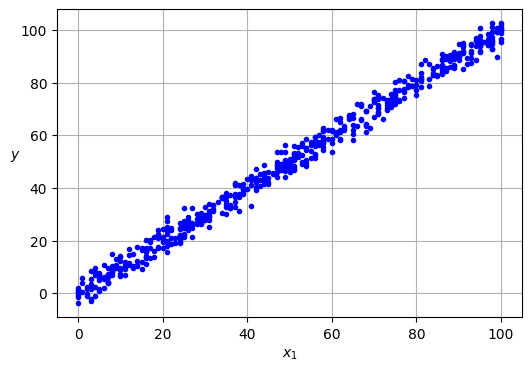

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid();

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X_train)
X_b, X_b.shape

(array([[ 1.,  2.],
        [ 1., 48.],
        [ 1., 54.],
        ...,
        [ 1., 26.],
        [ 1., 31.],
        [ 1., 72.]]),
 (559, 2))

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)
theta_best

array([0.0373417 , 0.99841704])

In [ ]:
X_new = np.array([[0], [100]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b.dot(theta_best)
y_predict

array([3.73417047e-02, 9.98790457e+01])

In [ ]:
# Add a column of ones to the feature matrix to account for the intercept term
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Add bias term (column of ones)

# Compute predictions
y_pred = X_b.dot(theta_best)

# Calculate the MSE
mse = mean_squared_error(y_train, y_pred)

mse


7.810938467001019

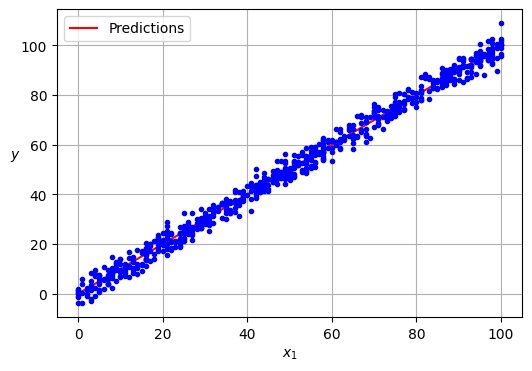

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()
plt.legend(loc="upper left")

plt.show()


In [ ]:
X_train.T.shape

(1, 559)

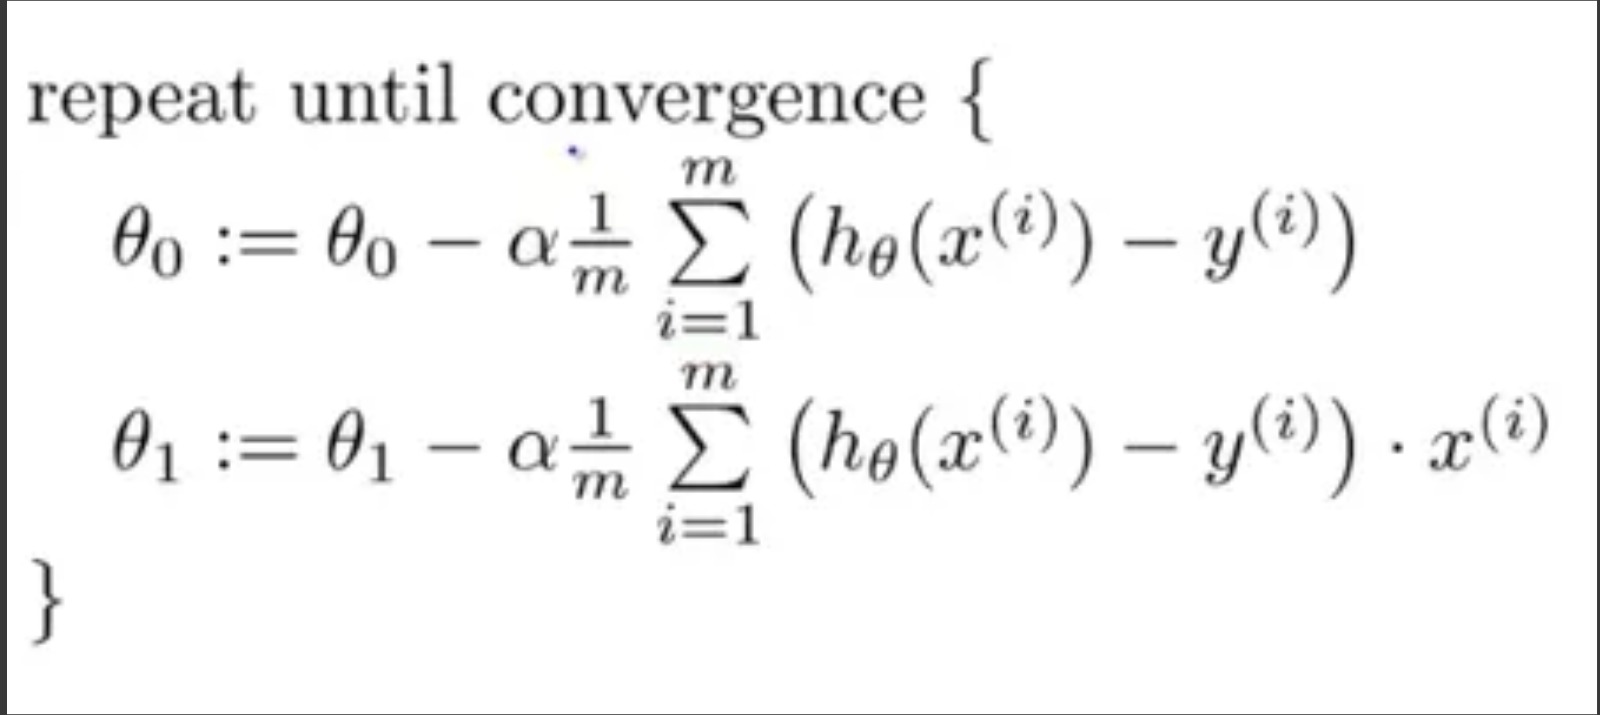

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.dropna(inplace=True)
test.dropna(inplace=True)
X = train.drop('y', axis=1)
y = train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [ ]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

X_b = np.c_[np.ones((m, 1)), X_train]


In [ ]:
m,n = X_train.shape
eta = 0.00025
n_iterations = 100000
theta = np.random.randn(n+1,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T @ (X_b @ theta - y_train)
    theta = theta - eta * gradients
theta

array([[-0.09664179],
       [ 1.00121669]])

In [ ]:
from sklearn.metrics import mean_squared_error

X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

y_pred = X_b_test @ theta
mse = mean_squared_error(y_test, y_pred)
mse

7.7529868012507235

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [ ]:

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

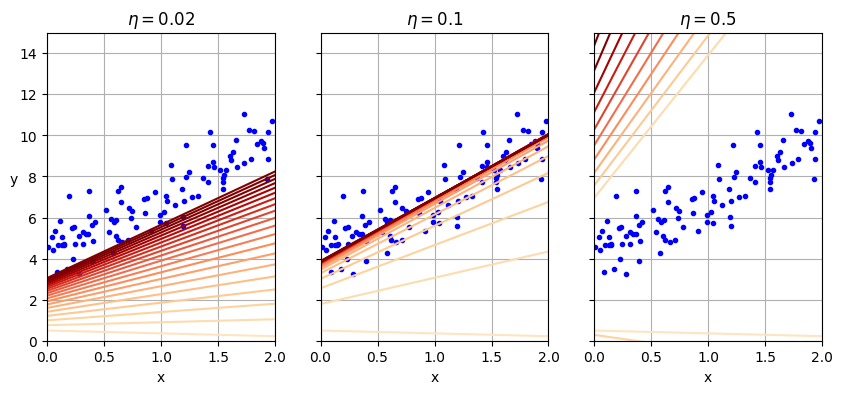

In [ ]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("x")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

# Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
eta = 0.1
n_epochs = 1000
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2*xi.T@(xi@theta-yi)
    theta = theta - eta * gradients

# gradients = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
# theta = theta - eta * gradients

In [ ]:
theta

array([[4.17686315],
       [2.85986577]])

In [ ]:
X_b[random_index]

array([1.        , 1.46398788])

In [ ]:
y[random_index : random_index + 1]

array([[8.48372443]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

In [ ]:
y[:5], y.ravel()[:5], y.ravel().ndim

(array([[6.33428778],
        [9.40527849],
        [8.48372443],
        [5.60438199],
        [4.71643995]]),
 array([6.33428778, 9.40527849, 8.48372443, 5.60438199, 4.71643995]),
 1)

# Mini-batch gradient descent

In [ ]:
len(X_b)

100

In [ ]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)         # mix randomly
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        theta = theta - eta * gradients

In [ ]:
np.random.permutation(m)

array([84, 29,  4, 85, 40, 69,  0, 46, 89, 82, 22, 74, 33, 73, 91, 79, 28,
       35,  2, 51, 32, 90,  7, 42, 44, 71, 13, 53, 27, 36, 41, 88,  5, 58,
       49, 57, 24, 99, 60, 48, 50, 34,  6, 18, 95, 97, 11, 76, 15, 80, 93,
       20, 26, 25, 19, 67, 72, 31, 66, 70, 38, 75, 62, 77, 65, 14, 78, 83,
       17, 47, 12, 92,  8, 55, 52, 54, 56, 64, 16, 98, 59, 43, 23, 39,  9,
       96, 68, 61, 45, 10, 30,  1, 21, 86, 87, 37, 63, 81, 94,  3])

In [ ]:
theta

array([[4.22023943],
       [2.7704472 ]])

# Polynomial Regression

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

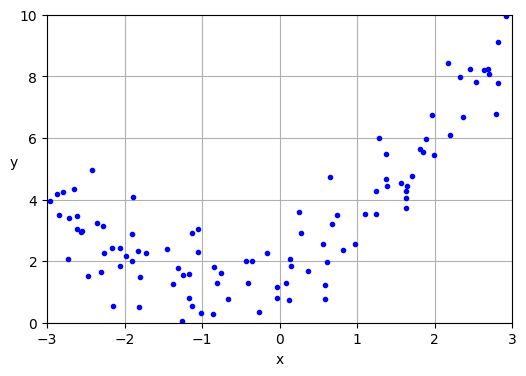

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = [[-3], [3]]

X_preds = lin_reg.predict(X_new)
X_preds

array([[1.03315352],
       [6.09487734]])

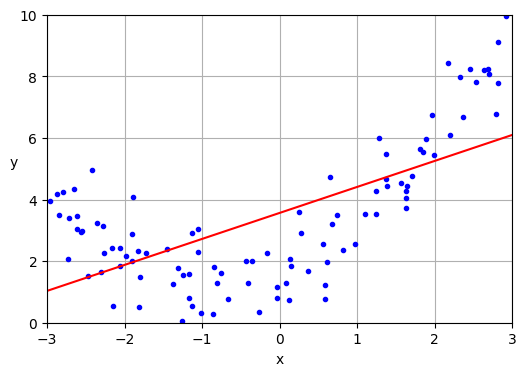

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, X_preds, 'r-')
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [ ]:
lin_reg.score(X_poly, y)

0.8525067519009746

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

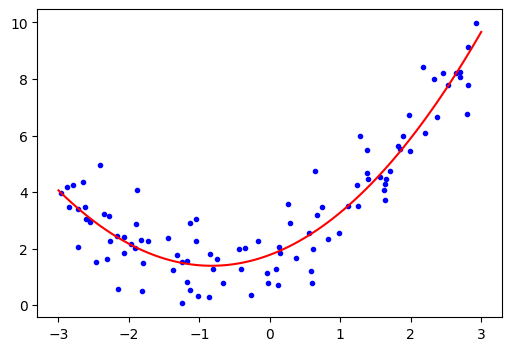

In [ ]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt

In [ ]:
X.shape

(100, 1)

In [ ]:
X_poly.shape

(100, 2)

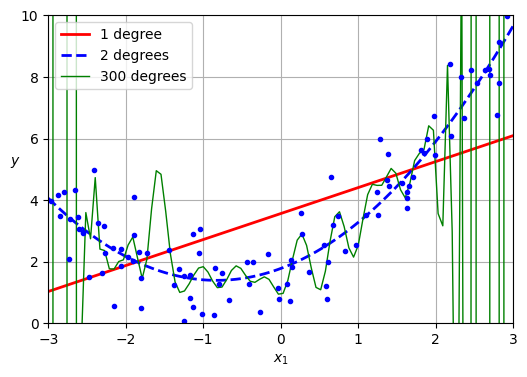

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))

for style, width, degree in (("r-", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  label = f"{degree} degree{'s' if degree > 1 else ''}"
  plt.plot(X_new, y_newbig, style, label=label, linewidth=width)
plt.plot(X, y, 'b.', linewidth = 3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

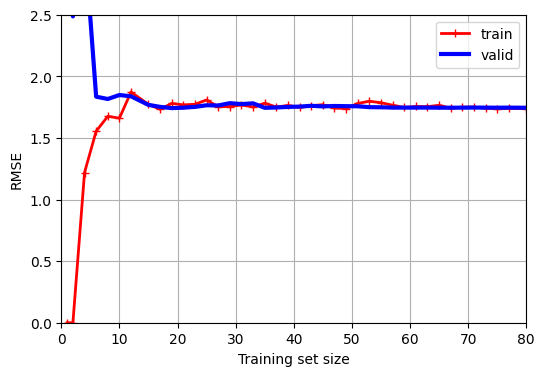

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])


plt.show()